# NLP with Bert for Sentiment Analysis

### Importing Modules

In [1]:
import ktrain
from ktrain import text

In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
train_b = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=20)
test_b = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=20)
print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [3]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=train_b.target_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350)

task: text classification
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


### Training the model

In [4]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 350
done.


In [5]:
learner.lr_find(max_epochs=5)

simulating training for different learning rates... this may take a few moments...
Train on 2257 samples
Epoch 1/5
2257/2257 [==============================] - 498s 221ms/sample - loss: 1.3559 - accuracy: 0.3567
Epoch 2/5
2257/2257 [==============================] - 476s 211ms/sample - loss: 0.4043 - accuracy: 0.8649
Epoch 3/5
 378/2257 [====>.........................] - ETA: 6:37 - loss: 1.2276 - accuracy: 0.4312

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


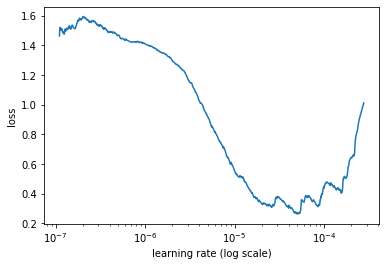

In [6]:
learner.lr_plot()

In [7]:
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Train on 2257 samples
Epoch 1/4
2257/2257 [==============================] - 498s 221ms/sample - loss: 0.6748 - accuracy: 0.7288
Epoch 2/4
2257/2257 [==============================] - 477s 211ms/sample - loss: 0.1240 - accuracy: 0.9575
Epoch 3/4
2257/2257 [==============================] - 476s 211ms/sample - loss: 0.0394 - accuracy: 0.9867
Epoch 4/4
2257/2257 [==============================] - 475s 211ms/sample - loss: 0.0101 - accuracy: 0.9965


In [8]:
learner.validate(val_data=(x_test, y_test), class_names=train_b.target_names)

                        precision    recall  f1-score   support

           alt.atheism       0.91      0.93      0.92       319
         comp.graphics       0.99      0.95      0.97       389
               sci.med       0.97      0.96      0.97       396
soc.religion.christian       0.96      0.97      0.97       398

              accuracy                           0.96      1502
             macro avg       0.96      0.96      0.96      1502
          weighted avg       0.96      0.96      0.96      1502



array([[298,   0,   9,  12],
       [ 15, 371,   2,   1],
       [  7,   4, 382,   3],
       [  9,   1,   1, 387]])

In [9]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [10]:
predictor.predict(test_b.data[0:1])

['sci.med']

### Saving the predictor

In [11]:
predictor.save('/tmp/my_predictor')

In [12]:
reloaded_predictor = ktrain.load_predictor('/tmp/my_predictor')

In [13]:
reloaded_predictor.predict(test_b.data[0:1])

['sci.med']